In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, log_loss
from matplotlib import pyplot as plt

In [2]:
def time_series_train_test(X, y, test_size=0.25):
    x_size = len(X)
    if x_size != len(y):
        raise ValueError
    split_index = int(x_size * (1 -test_size))
    if (x_size % 2) == 1:
        split_index += 1
    X_train = X.iloc[:split_index]
    y_train = y.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_test = y.iloc[split_index:]
    return (X_train, y_train, X_test, y_test)

In [3]:
def fit_model(X, y, model, test_size=0.25):
    X_train, y_train, X_test, y_test = time_series_train_test(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"Точность на обучающей выборке: {round(model.score(X_train, y_train), 3)}")
    print(f"Точность на тестовой выборке: {round(model.score(X_test, y_test), 3)}")
    print(f"MSE: {round(mse, 2)}")
    print(f"RMSE: {round(math.sqrt(mse), 3)}")
    plt.figure(figsize=(15, 7))
    plt.plot(range(len(y_test.values)), y_test.values, label='test data')
    plt.plot(range(len(pred)), pred, 'r--', label='prediction')
    plt.legend(loc=(1.01, 0))
    plt.title("Точность на тестовой выборке")
    plt.show()

In [4]:
def fit_model_sub(X, y, model, test_size=0.25, figsize=(15, 10), titles=None):
    if titles is None:
        titles = list(range(len(X)))
    fig, axes = plt.subplots(len(X), 1, figsize=figsize)
    for _X, _y, ax, title in zip(X, y, axes, titles):
        X_train, y_train, X_test, y_test = time_series_train_test(_X, _y, test_size=test_size)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        print(title)
        print(f"Точность на обучающей выборке: {round(model.score(X_train, y_train), 3)}")
        print(f"Точность на тестовой выборке: {round(model.score(X_test, y_test), 3)}")
        print(f"MSE: {round(mse, 3)}")
        print(f"RMSE: {round(math.sqrt(mse), 3)}")
        ax.plot(range(len(y_test.values)), y_test.values, label='test data')
        ax.plot(range(len(pred)), pred, 'r--', label='prediction')
        ax.legend(loc=(1.01, 0))
        ax.title.set_text(title)
    plt.show()

In [5]:
def make_variables(df, select_parts):
    df_clone = df.copy()
    parts = {
        'Year': df.index.year,
        'Week': df.index.week,
        'Day': df.index.day,
        'Month': df.index.month,
        'Quarter': df.index.quarter,
        'Hour': df.index.hour,
        'Minute': df.index.minute
    }
    for i in select_parts:
        if parts.get(i) is not None:
            df_clone[i] = parts[i]
    return df_clone

In [6]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


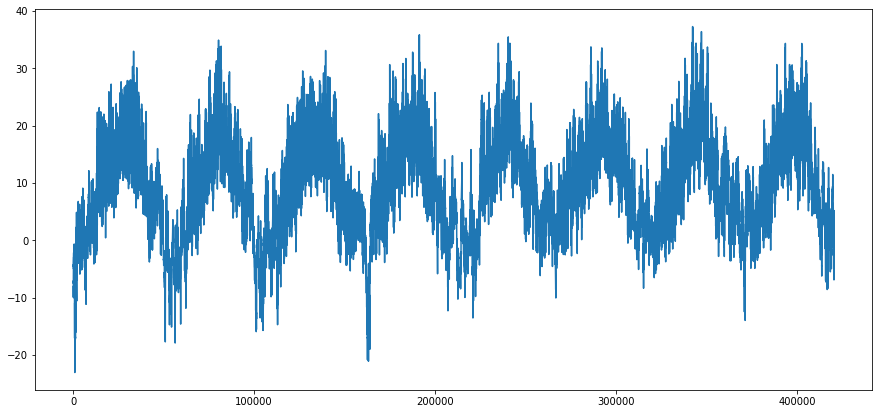

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(range(len(df['T (degC)'])), df['T (degC)'])
plt.show()

In [8]:
df_time = df[['Date Time', 'T (degC)']]

In [9]:
df_time.head()

,Date Time,T (degC)
0,01.01.2009 00:10:00,-8.02
1,01.01.2009 00:20:00,-8.41
2,01.01.2009 00:30:00,-8.51
3,01.01.2009 00:40:00,-8.31
4,01.01.2009 00:50:00,-8.27


In [10]:
df_time['Date Time'] = pd.to_datetime(df_time['Date Time'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_time = df_time.set_index("Date Time")
df_time_10minutes = df_time.copy()
df_time_1hour = df_time.resample("1h").mean().dropna()
df_time_3hour = df_time.resample("3h").mean().dropna()
df_time_6hour = df_time.resample("6h").mean().dropna()
df_time_12hour = df_time.resample("12h").mean().dropna()
df_time_1day = df_time.resample("1d").mean().dropna()
df_time_3day = df_time.resample("3d").mean().dropna()
df_time_7day = df_time.resample("7d").mean().dropna()
df_time_10day = df_time.resample("10d").mean().dropna()
df_time_14day = df_time.resample("14d").mean().dropna()
df_time_1month = df_time.resample("1m").mean().dropna()

In [12]:
for_minutes = ['Year', 'Week', 'Day', 'Month', 'Quarter', 'Hour', 'Minute']
for_hours = ['Year', 'Week', 'Day', 'Month', 'Quarter', 'Hour']
for_days = ['Year', 'Week', 'Day', 'Month', 'Quarter']
for_months = ['Year', 'Month', 'Quarter']

In [13]:
df_time_10minutes = make_variables(df_time_10minutes, for_minutes)
df_time_1hour = make_variables(df_time_1hour, for_hours)
df_time_3hour = make_variables(df_time_3hour, for_hours)
df_time_6hour = make_variables(df_time_6hour, for_hours)
df_time_12hour = make_variables(df_time_12hour, for_hours)
df_time_1day = make_variables(df_time_1day, for_hours)
df_time_3day = make_variables(df_time_3day, for_hours)
df_time_7day = make_variables(df_time_7day, for_hours)
df_time_10day = make_variables(df_time_10day, for_hours)
df_time_14day = make_variables(df_time_14day, for_hours)
df_time_1month = make_variables(df_time_1month, for_hours)

In [14]:
target = 'T (degC)'
features = [i for i in df_time if i != target]

In [15]:
df_time_12hour.head()

,T (degC),Year,Week,Day,Month,Quarter,Hour
Date Time,,,,,,,
2009-01-01 00:00:00,-8.395775,2009,1,1,1,1,0
2009-01-01 12:00:00,-5.247500,2009,1,1,1,1,12
2009-01-02 00:00:00,-3.765000,2009,1,2,1,1,0
2009-01-02 12:00:00,-2.955972,2009,1,2,1,1,12
2009-01-03 00:00:00,4.199444,2009,1,3,1,1,0


# Исходные данные (минуты)

Точность на обучающей выборке: 0.769
Точность на тестовой выборке: 0.648
MSE: 22.68
RMSE: 4.762


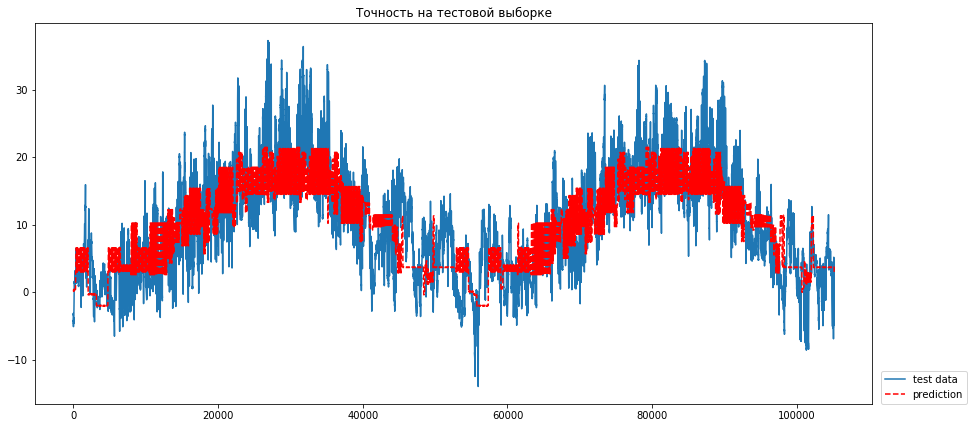

In [134]:
forest = RandomForestRegressor(random_state=0, max_depth=12, n_estimators=40, max_leaf_nodes=80)
fit_model(df_time_10minutes[for_minutes], df_time_10minutes[target], forest)

Точность на обучающей выборке: 0.8
Точность на тестовой выборке: 0.685
MSE: 20.29
RMSE: 4.505


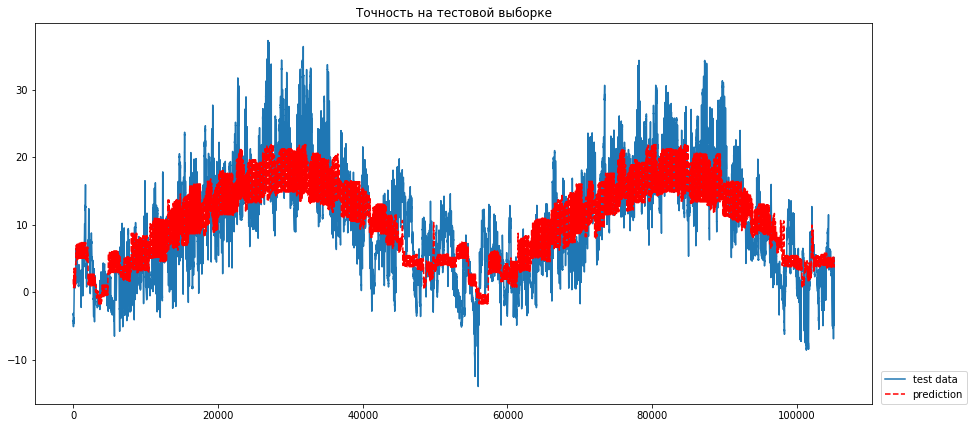

In [133]:
gforest = GradientBoostingRegressor(
    random_state=42, max_depth=15, n_estimators=30, max_leaf_nodes=35, subsample=0.2)
fit_model(df_time_10minutes[for_minutes], df_time_10minutes[target], gforest)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Точность на обучающей выборке: 0.697
Точность на тестовой выборке: 0.676
MSE: 20.88
RMSE: 4.57


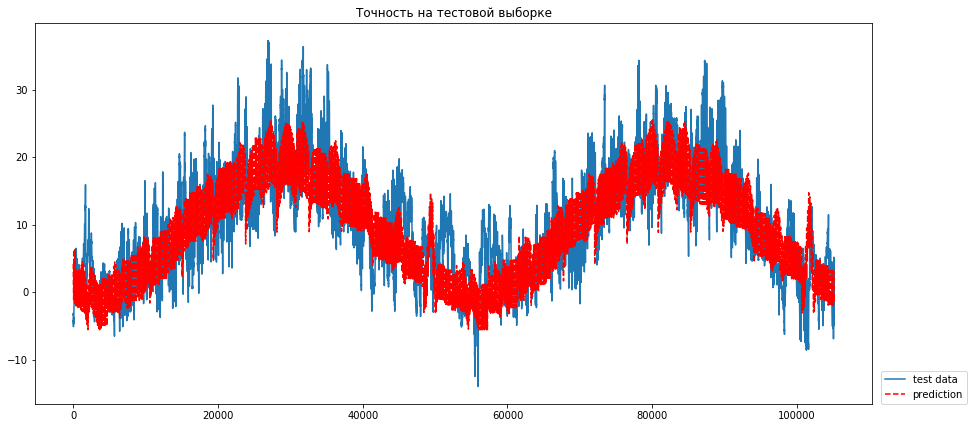

In [35]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=[100, 5])
fit_model(df_time_10minutes[for_hours], df_time_10minutes[target], mlp)

# Период - часы

Точность на обучающей выборке: 0.029
Точность на тестовой выборке: 0.037
MSE: 59.88
RMSE: 7.738


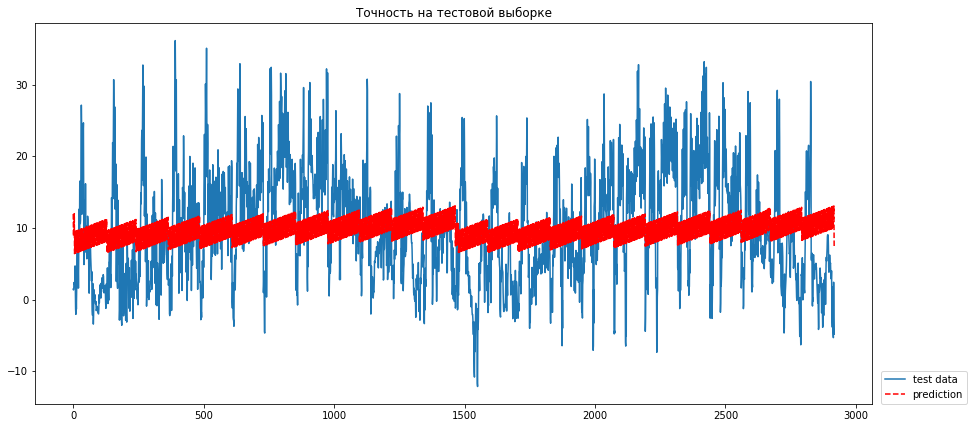

In [23]:
mlp = MLPRegressor(hidden_layer_sizes=[10])
fit_model(df_time_6hour[for_hours], df_time_6hour[target], mlp)

In [16]:
X = [
    df_time_1hour[for_hours],
    df_time_3hour[for_hours],
    df_time_6hour[for_hours],
    df_time_12hour[for_hours]
]

Y = [
    df_time_1hour[target],
    df_time_3hour[target],
    df_time_6hour[target],
    df_time_12hour[target]
]

titles = [
    '1 час',
    '3 часа',
    '6 часов',
    '12 часов'
]

1 час
Точность на обучающей выборке: 0.776
Точность на тестовой выборке: 0.655
MSE: 22.129
RMSE: 4.704
3 часа
Точность на обучающей выборке: 0.784
Точность на тестовой выборке: 0.665
MSE: 21.301
RMSE: 4.615
6 часов
Точность на обучающей выборке: 0.795
Точность на тестовой выборке: 0.674
MSE: 20.247
RMSE: 4.5
12 часов
Точность на обучающей выборке: 0.815
Точность на тестовой выборке: 0.689
MSE: 18.582
RMSE: 4.311


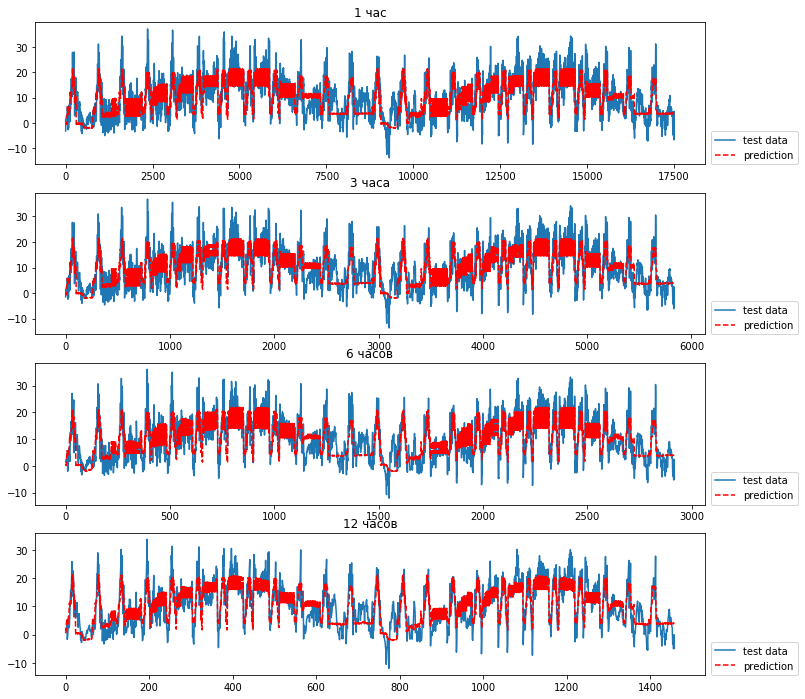

In [191]:
forest = RandomForestRegressor(
    random_state=42, max_depth=17, n_estimators=80, max_leaf_nodes=80)
fit_model_sub(X, Y, forest, figsize=(12, 12), titles=titles)

1 час
Точность на обучающей выборке: 0.795
Точность на тестовой выборке: 0.691
MSE: 19.829
RMSE: 4.453
3 часа
Точность на обучающей выборке: 0.798
Точность на тестовой выборке: 0.703
MSE: 18.886
RMSE: 4.346
6 часов
Точность на обучающей выборке: 0.804
Точность на тестовой выборке: 0.704
MSE: 18.394
RMSE: 4.289
12 часов
Точность на обучающей выборке: 0.815
Точность на тестовой выборке: 0.706
MSE: 17.557
RMSE: 4.19


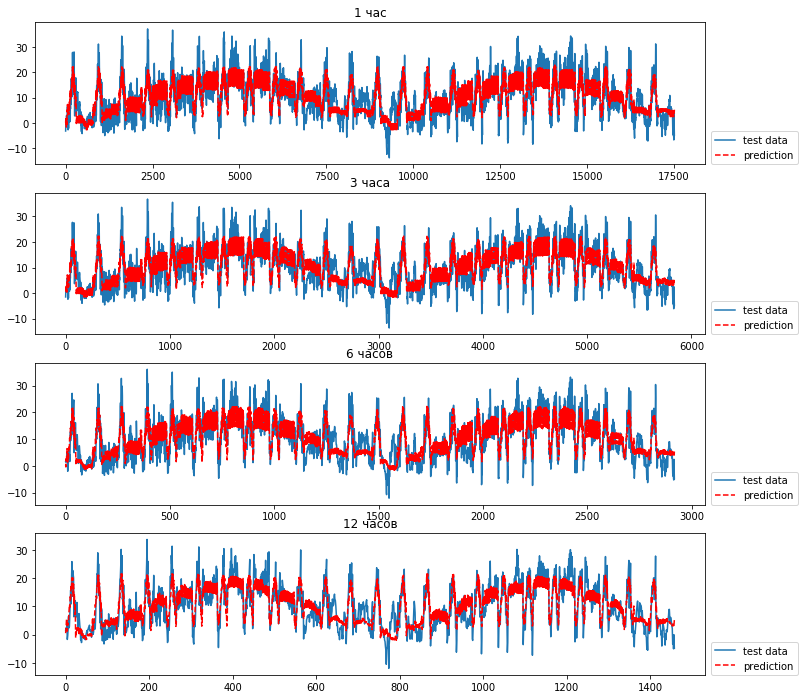

In [189]:
gforest = GradientBoostingRegressor(
    random_state=0, max_depth=7, n_estimators=40, max_leaf_nodes=22, subsample=0.25)
fit_model_sub(X, Y, gforest, figsize=(12, 12), titles=titles)

In [20]:
MLPRegressor?

1 час
Точность на обучающей выборке: 0.029
Точность на тестовой выборке: 0.005
MSE: 63.878
RMSE: 7.992
3 часа
Точность на обучающей выборке: 0.245
Точность на тестовой выборке: 0.242
MSE: 48.275
RMSE: 6.948
6 часов
Точность на обучающей выборке: 0.271
Точность на тестовой выборке: 0.275
MSE: 45.11
RMSE: 6.716


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


12 часов
Точность на обучающей выборке: 0.403
Точность на тестовой выборке: 0.339
MSE: 39.465
RMSE: 6.282


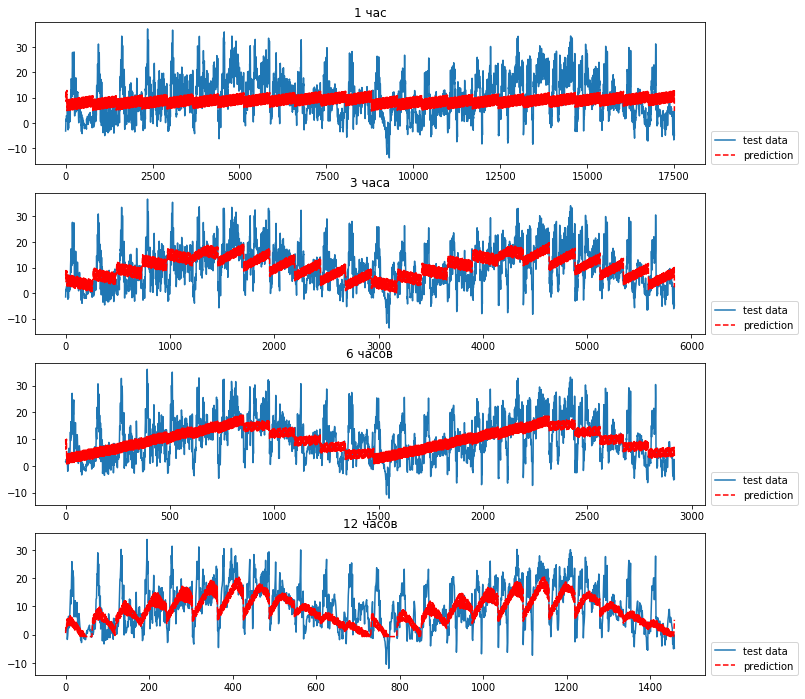

In [30]:
mlp = MLPRegressor(hidden_layer_sizes=[75, 5])
fit_model_sub(X, Y, mlp, figsize=(12, 12), titles=titles)

# Период - дни

In [19]:
X_days = [
    df_time_1day[for_days],
    df_time_3day[for_days],
    df_time_7day[for_days],
    df_time_10day[for_days],
    df_time_14day[for_days]
]

Y_days = [
    df_time_1day[target],
    df_time_3day[target],
    df_time_7day[target],
    df_time_10day[target],
    df_time_14day[target]
]

titles_days= [
    '1 день',
    '3 дня',
    '7 дней',
    '10 дней',
    '14 дней' 
]

1 день
Точность на обучающей выборке: 0.811
Точность на тестовой выборке: 0.706
MSE: 16.129
RMSE: 4.016
3 дня
Точность на обучающей выборке: 0.862
Точность на тестовой выборке: 0.771
MSE: 9.819
RMSE: 3.134
7 дней
Точность на обучающей выборке: 0.916
Точность на тестовой выборке: 0.798
MSE: 6.269
RMSE: 2.504
10 дней
Точность на обучающей выборке: 0.946
Точность на тестовой выборке: 0.768
MSE: 6.189
RMSE: 2.488
14 дней
Точность на обучающей выборке: 0.965
Точность на тестовой выборке: 0.829
MSE: 3.489
RMSE: 1.868


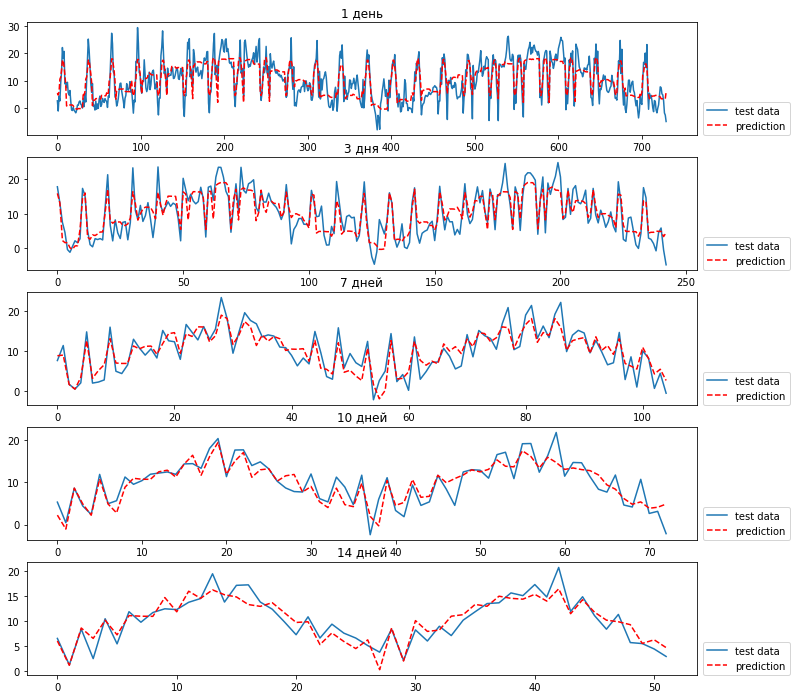

In [165]:
g = GradientBoostingRegressor(random_state=42, max_depth=9, n_estimators=30, subsample=0.85, max_leaf_nodes=18)
fit_model_sub(X_days, Y_days, g, figsize=(12, 12), titles=titles_days)

1 день
Точность на обучающей выборке: 0.819
Точность на тестовой выборке: 0.708
MSE: 15.993
RMSE: 3.999
3 дня
Точность на обучающей выборке: 0.864
Точность на тестовой выборке: 0.768
MSE: 9.964
RMSE: 3.157
7 дней
Точность на обучающей выборке: 0.914
Точность на тестовой выборке: 0.809
MSE: 5.929
RMSE: 2.435
10 дней
Точность на обучающей выборке: 0.941
Точность на тестовой выборке: 0.754
MSE: 6.571
RMSE: 2.563
14 дней
Точность на обучающей выборке: 0.95
Точность на тестовой выборке: 0.809
MSE: 3.895
RMSE: 1.974


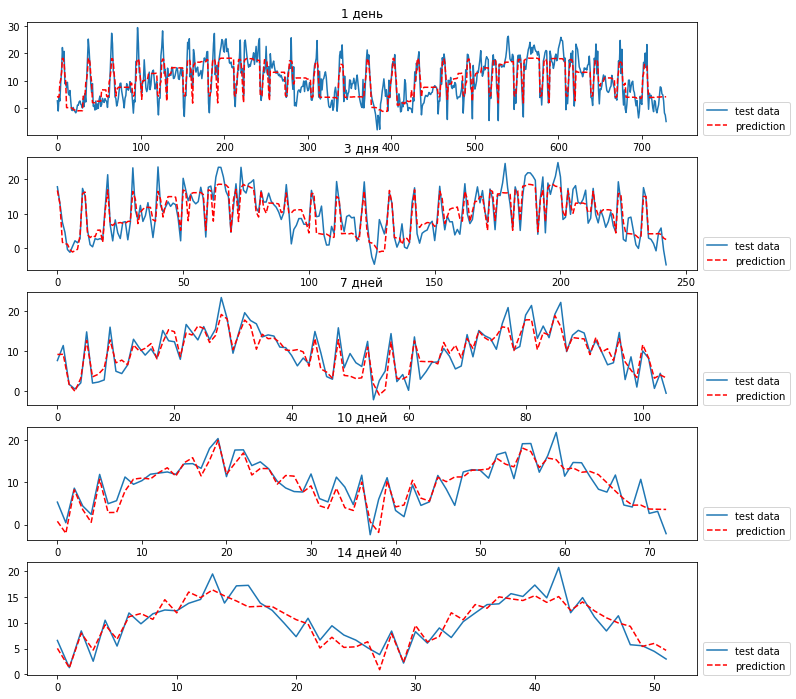

In [187]:
forest = RandomForestRegressor(max_depth=9, n_estimators=40, max_leaf_nodes=45)
fit_model_sub(X_days, Y_days, forest, titles=titles_days, figsize=(12, 12))

1 день
Точность на обучающей выборке: 0.266
Точность на тестовой выборке: 0.217
MSE: 42.926
RMSE: 6.552
3 дня
Точность на обучающей выборке: 0.013
Точность на тестовой выборке: 0.008
MSE: 42.602
RMSE: 6.527
7 дней
Точность на обучающей выборке: 0.06
Точность на тестовой выборке: 0.023
MSE: 30.307
RMSE: 5.505
10 дней
Точность на обучающей выборке: 0.002
Точность на тестовой выборке: -0.09
MSE: 29.142
RMSE: 5.398
14 дней
Точность на обучающей выборке: -141.492
Точность на тестовой выборке: -182.849
MSE: 3750.972
RMSE: 61.245


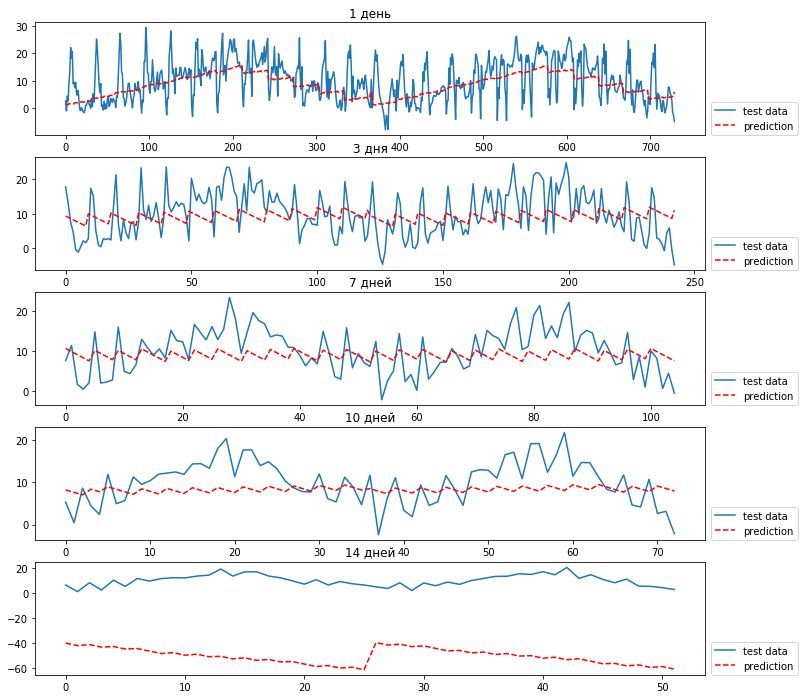

In [20]:
mlp = MLPRegressor()
fit_model_sub(X_days, Y_days, mlp, titles=titles_days, figsize=(12, 12))